In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
from matplotlib import pyplot as plt


In [3]:
final_log = {}
for method in os.listdir("./hz-bc-tyc_1"):
    final_log[method] = pickle.load(open('./hz-bc-tyc_1/%s/log.pkl' % method, 'rb'))[-1]

In [4]:
metrics = ['avg_speed', 'travel_time', 'waiting_time', 'fuel_consumption', 'CO_emission', 'CO2_emission']

In [5]:
data = pd.DataFrame(columns=['method'] + metrics)
for k, v in final_log.items():
    veh_logs = v['veh_logs']
    for log in veh_logs:        
        row = {
            'method': k,
            'avg_speed': log['avg_speed'],
            'travel_time': log['travel_time'],
            'waiting_time': log['waiting_time'],
            'fuel_consumption': log['fuel_consumption'],
            'CO_emission': log['CO_emission'] / 1000000,
            'CO2_emission': log['CO2_emission'] / 1000000,
        }
        data = data.append(row, ignore_index=True)

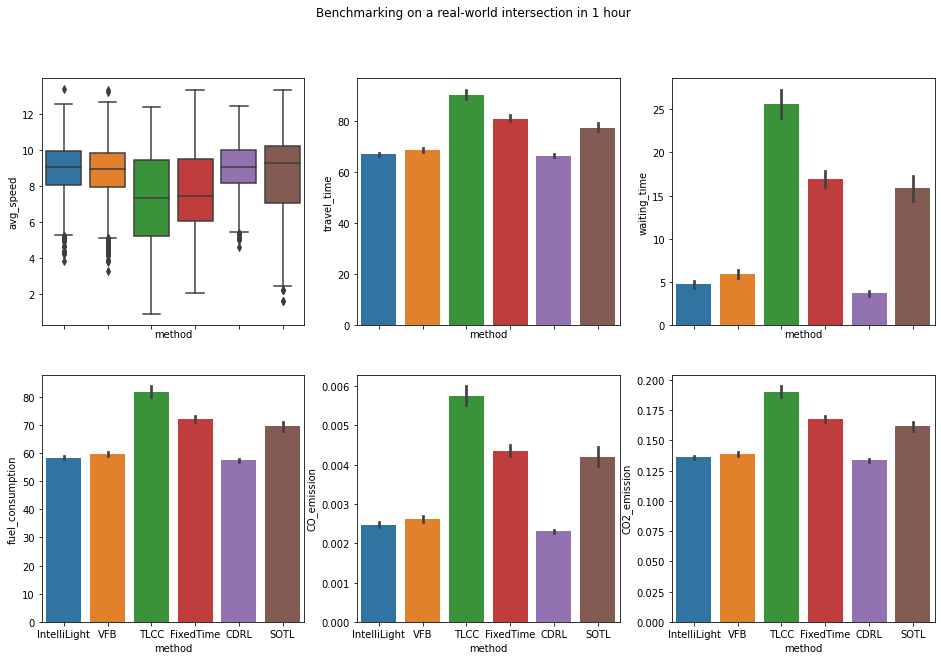

In [31]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,10))
fig.suptitle('Benchmarking on a real-world intersection in 1 hour')
sns.boxplot(ax=axes[0, 0], x="method", y='avg_speed', data=data)
sns.barplot(ax=axes[0, 1], x="method", y='travel_time', data=data)
sns.barplot(ax=axes[0, 2], x="method", y='waiting_time', data=data)
sns.barplot(ax=axes[1, 0], x="method", y='fuel_consumption', data=data)
sns.barplot(ax=axes[1, 1], x="method", y='CO_emission', data=data)
sns.barplot(ax=axes[1, 2], x="method", y='CO2_emission', data=data)
plt.savefig('output.svg')

In [32]:
final_log = {}
for method in os.listdir("./atlanta/"):
    final_log[method] = pickle.load(open('./atlanta/%s/log.pkl' % method, 'rb'))[-1]

In [53]:
data = pd.DataFrame(columns=['method', 'step', 'intersection', 'waiting_time'])
avg_speed = 0
for method in ['FixedTime', 'CDRL']:
    for intersection in range(len(final_log[method]['tf_logs'])):
        for k, v in final_log[method]['tf_logs'][intersection].items():
            if k == 'lanes':
                continue
            data = data.append({
                'method': method,
                'intersection': intersection,
                'step': k,
                'waiting_time': np.mean(v['waiting_time'])
            }, ignore_index=True)

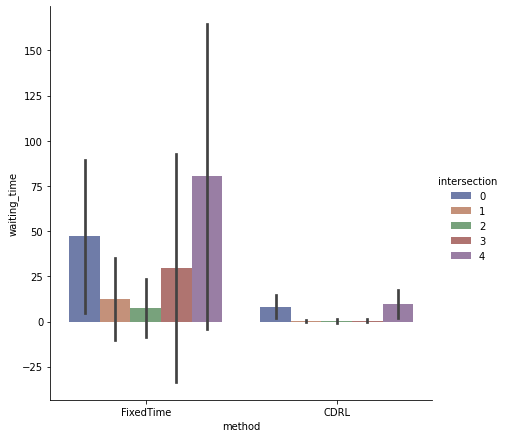

In [54]:
sns.catplot(
    data=data, kind="bar",
    x="method", y="waiting_time", hue="intersection",
    ci="sd", palette="dark", alpha=.6, height=6
)

In [48]:
final_log['CDRL']['tf_logs'][0]

{'lanes': ['-290405874#2_0',
  '-290405874#2_1',
  '-354587522#2_0',
  '-354587522#2_1',
  '290405872#0_0',
  '290405872#0_1',
  '354587523_0',
  '354587523_1'],
 0.0: {'CO2_emission': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'CO_emission': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'fuel_consumption': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'num_halting_vehs': [0, 0, 0, 0, 0, 0, 0, 0],
  'speed': [11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11],
  'occupancy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'num_vehs': [0, 0, 0, 0, 0, 0, 0, 0],
  'waiting_time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'queue_length': [0, 0, 0, 0, 0, 0, 0, 0]},
 1.0: {'CO2_emission': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'CO_emission': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'fuel_consumption': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'num_halting_vehs': [0, 0, 0, 0, 0, 0, 0, 0],
  'speed': [11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11],
  'occupancy': [0.0, 0.0, 

In [45]:
tf_0

{'lanes': ['-290405874#2_0',
  '-290405874#2_1',
  '-354587522#2_0',
  '-354587522#2_1',
  '290405872#0_0',
  '290405872#0_1',
  '354587523_0',
  '354587523_1'],
 0.0: {'CO2_emission': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'CO_emission': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'fuel_consumption': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'num_halting_vehs': [0, 0, 0, 0, 0, 0, 0, 0],
  'speed': [11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11],
  'occupancy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'num_vehs': [0, 0, 0, 0, 0, 0, 0, 0],
  'waiting_time': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'queue_length': [0, 0, 0, 0, 0, 0, 0, 0]},
 1.0: {'CO2_emission': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'CO_emission': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'fuel_consumption': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'num_halting_vehs': [0, 0, 0, 0, 0, 0, 0, 0],
  'speed': [11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11, 11.11],
  'occupancy': [0.0, 0.0, 